In [22]:
# Load the data

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sys import exit
import zipfile

sns.set_palette("Greens", n_colors=1)

#train = pd.read_csv(r'D:\Dropbox\16 Winter\TIM245\Project\train.csv', sep = ';', parse_dates=['Dates']);
address = r'D:\Dropbox\16 Winter\TIM245\Project\train.csv'
address2 = r'D:\Dropbox\16 Winter\TIM245\Project\test.csv'

train = pd.read_csv(address, parse_dates=['Dates'])

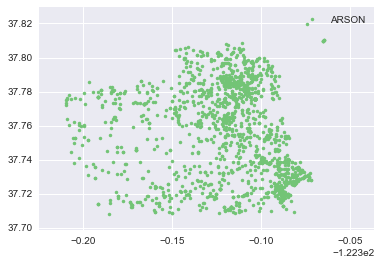

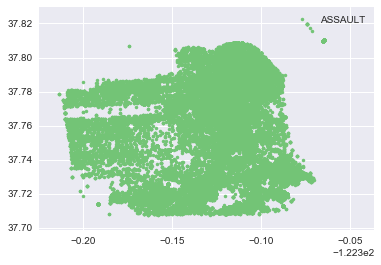

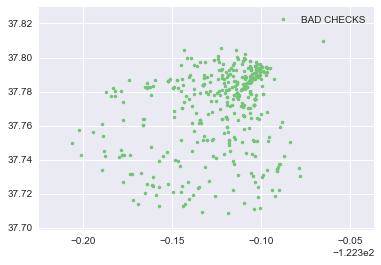

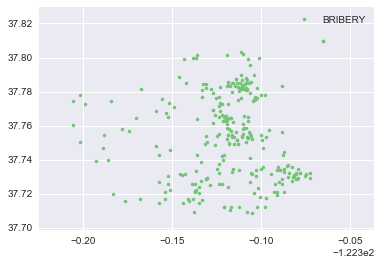

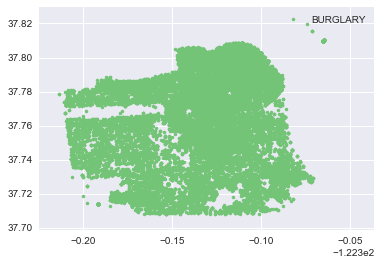

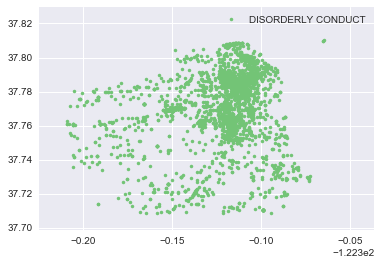

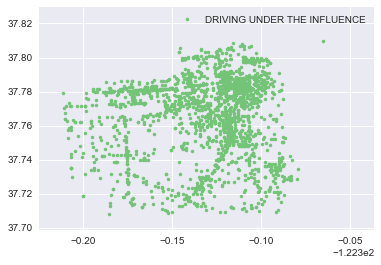

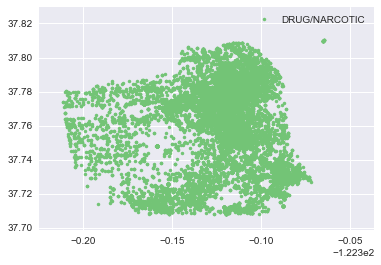

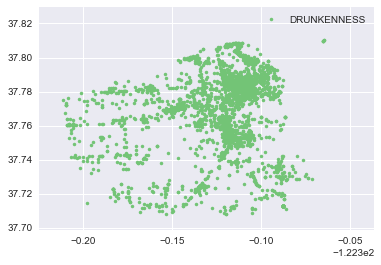

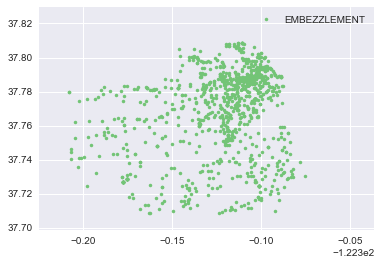

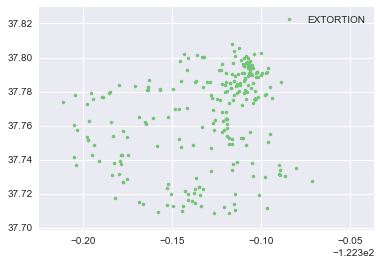

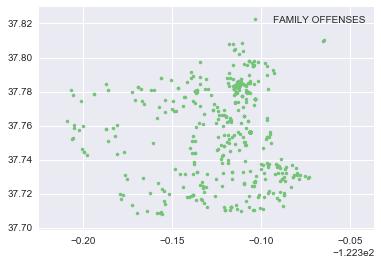

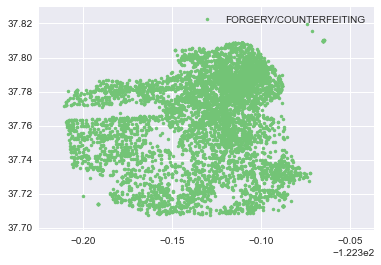

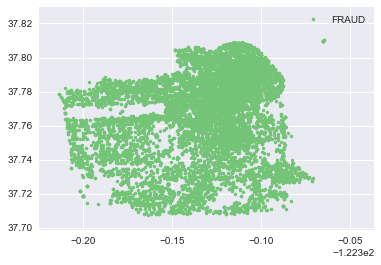

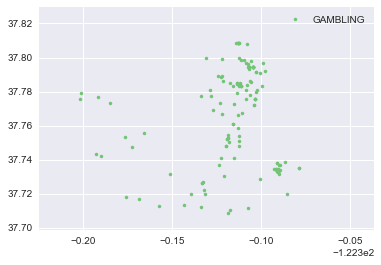

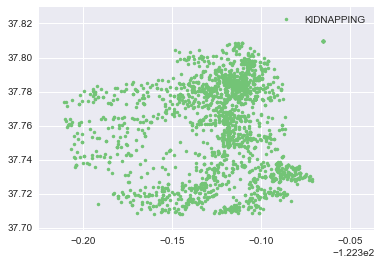

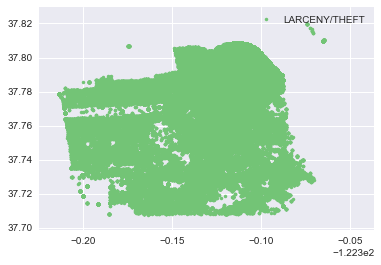

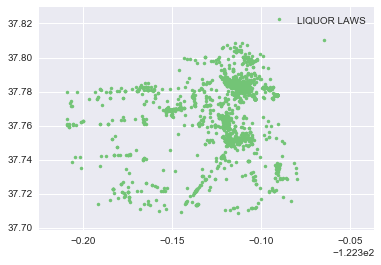

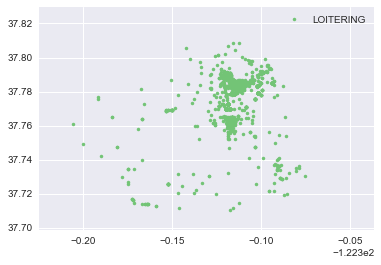

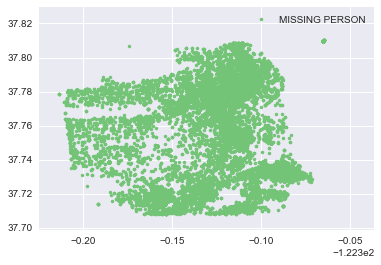

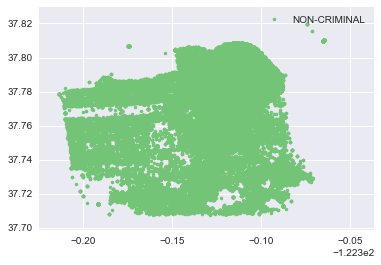

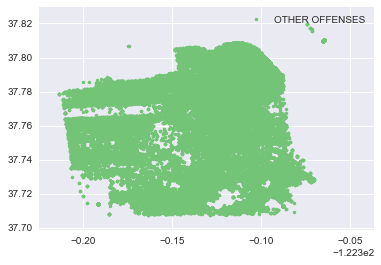

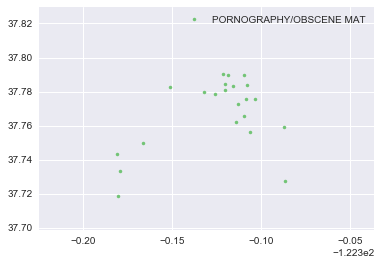

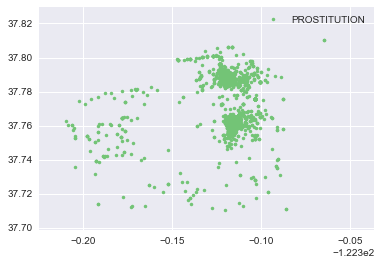

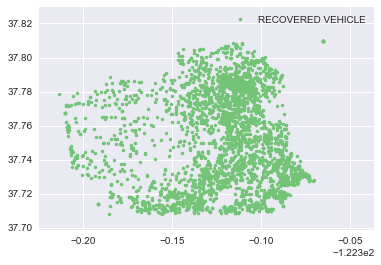

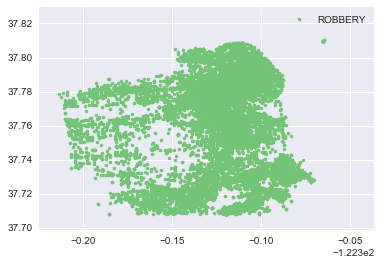

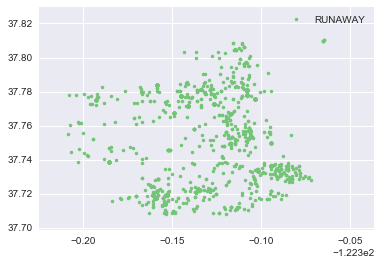

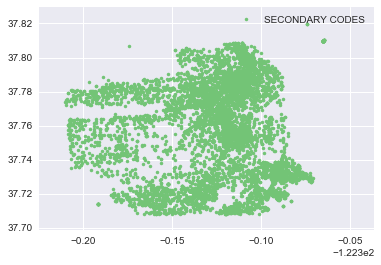

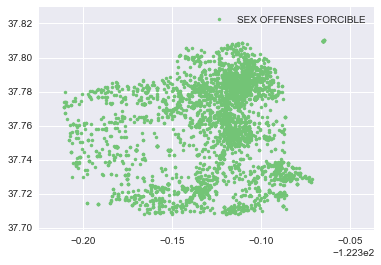

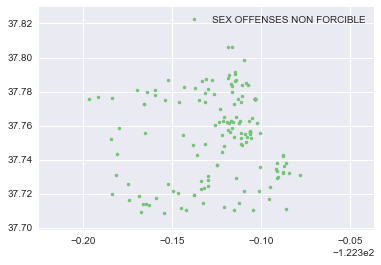

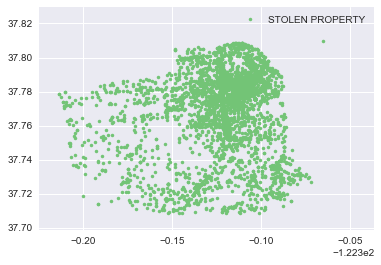

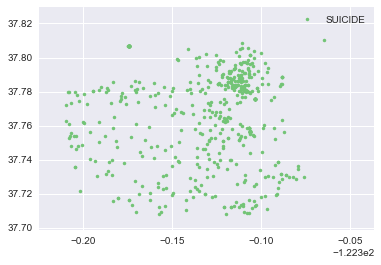

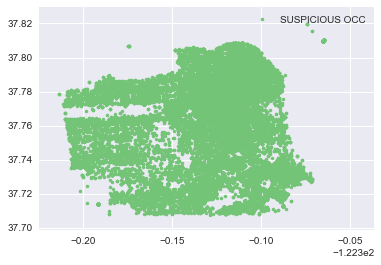

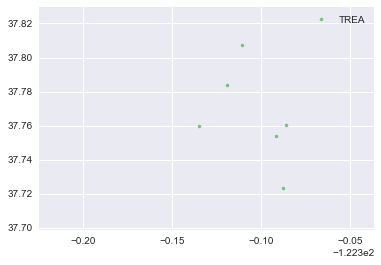

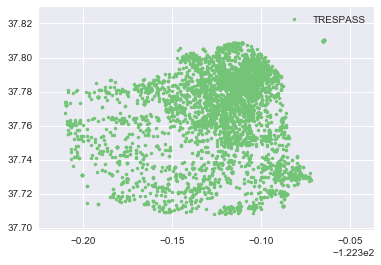

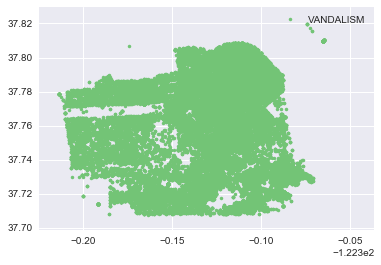

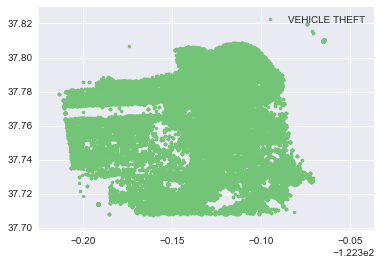

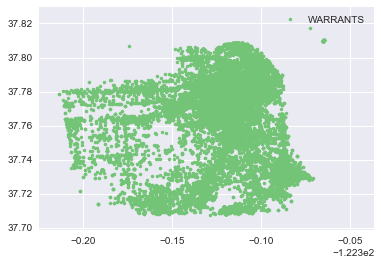

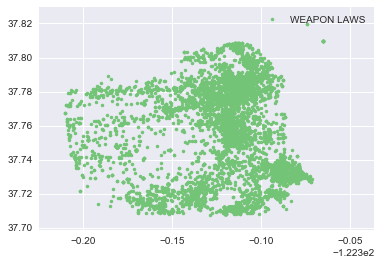

In [24]:
# Plot X and Y feature
XY = train[['X', 'Y', 'Category']]

allList = [
    'ARSON',
	'ASSAULT',
	'BAD CHECKS',
	'BRIBERY',
	'BURGLARY',
	'DISORDERLY CONDUCT',
	'DRIVING UNDER THE INFLUENCE',
	'DRUG/NARCOTIC',
	'DRUNKENNESS',
	'EMBEZZLEMENT',
	'EXTORTION',
	'FAMILY OFFENSES',
	'FORGERY/COUNTERFEITING',
	'FRAUD',
	'GAMBLING',
	'KIDNAPPING',
	'LARCENY/THEFT',
	'LIQUOR LAWS',
	'LOITERING',
	'MISSING PERSON',
	'NON-CRIMINAL',
	'OTHER OFFENSES',
	'PORNOGRAPHY/OBSCENE MAT',
	'PROSTITUTION',
	'RECOVERED VEHICLE',
	'ROBBERY',
	'RUNAWAY',
	'SECONDARY CODES',
	'SEX OFFENSES FORCIBLE',
	'SEX OFFENSES NON FORCIBLE',
	'STOLEN PROPERTY',
	'SUICIDE',
	'SUSPICIOUS OCC',
	'TREA',
	'TRESPASS',
	'VANDALISM',
	'VEHICLE THEFT',
	'WARRANTS',
	'WEAPON LAWS'
]

for l in allList:
	topFive = []
	topFive.append(l)
	justTop = XY.loc[XY['Category'].isin(topFive)]
	groups = justTop.groupby('Category')
	# Plot
	fig, ax = plt.subplots()
	ax.set_xlim([-122.5247, -122.3366])
	ax.set_ylim([37.699, 37.8299])
	for name, group in groups:
	    ax.plot(group.X, group.Y, marker='.', linestyle='', label=name)
	ax.legend()
	plt.show()


In [9]:
train.Category = train.Category.str.lower()
train.Resolution = train.Resolution.str.lower()
train.Descript = train.Descript.str.lower()
train.PdDistrict = train.PdDistrict.str.capitalize()
# new column for statistics by years
train['Year'] = train['Dates'].map(lambda x: x.year).astype(int)
train['Hour'] = train['Dates'].map(lambda x: x.hour).astype(int)

hours = train.Hour.unique()
hours.sort()

districts = train['PdDistrict'].unique()
districts.sort()


# list of days will be helpful for sorting
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

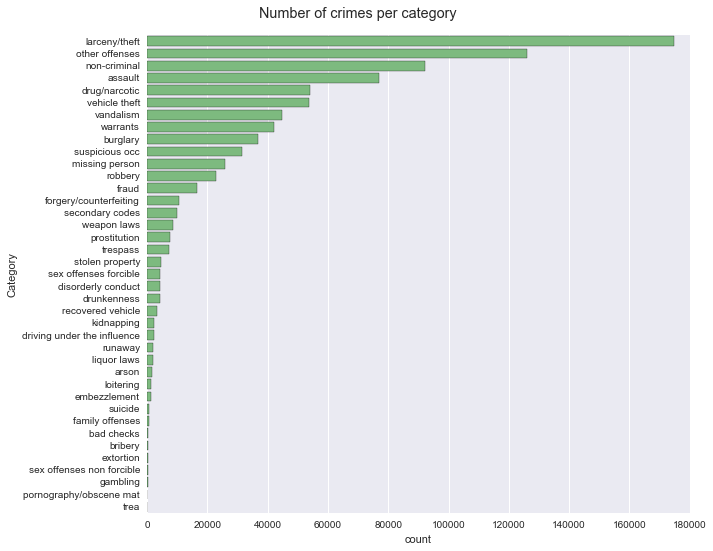

In [10]:
# Plot number of crimes per category

f = plt.figure(figsize=(10,8))
sns.countplot(palette = sns.color_palette(), y="Category", data=train, order=train.Category.value_counts().index)
f.tight_layout()
st = f.suptitle('Number of crimes per category', fontsize="x-large")
st.set_y(0.95)
f.subplots_adjust(top=0.9)
f.savefig('Number of crimes per category.png')

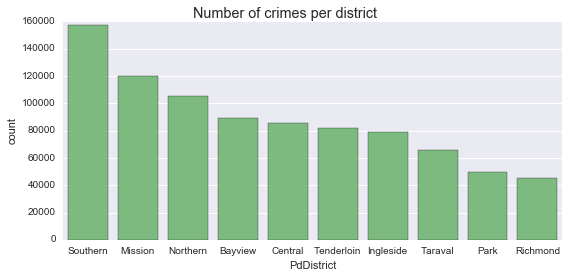

In [11]:
# Plot number of crimes per police district

f = plt.figure(figsize=(8,4))
sns.countplot(palette = sns.color_palette(), x="PdDistrict", data=train,  order=train.PdDistrict.value_counts().index)
f.tight_layout()
st = f.suptitle('Number of crimes per district', fontsize="x-large")
st.set_y(0.95)
f.subplots_adjust(top=0.9)
f.savefig('Number of crimes per district.png')

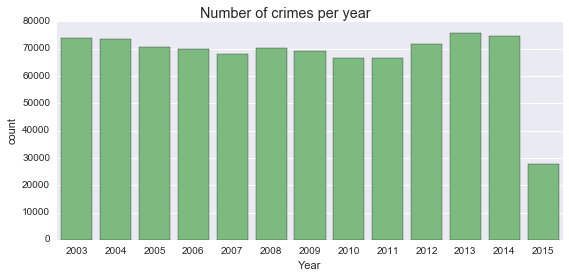

In [12]:
# Plot number of crimes per year

years = train.Year.unique()
years.sort()
f = plt.figure(figsize=(8,4))
sns.countplot(palette = sns.color_palette(), x="Year", data=train, order=years)
f.tight_layout()
st = f.suptitle('Number of crimes per year', fontsize="x-large")
st.set_y(0.95)
f.subplots_adjust(top=0.9)
f.savefig('Number of crimes per year.png')

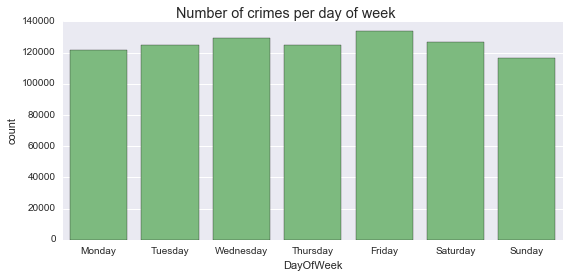

In [13]:
# Plot number of crimes per day of week

f = plt.figure(figsize=(8,4))
sns.countplot(palette = sns.color_palette(),x="DayOfWeek", data=train, order=week_days)
f.tight_layout()
st = f.suptitle('Number of crimes per day of week', fontsize="x-large")
st.set_y(0.95)
f.subplots_adjust(top=0.9)
f.savefig('Number of crimes per day of week.png')

In [14]:
# Prepare the categories and divide them into groups

categories = {
    'thefts' : ['larceny/theft', 'robbery', 'burglary','stolen property'],
    'money offences' : ['bribery', 'extortion', 'gambling', 'embezzlement'],
    'fraud' : ['fraud', 'forgery/counterfeiting', 'bad checks'],
    'health danger' : ['assault', 'family offenses', 'kidnapping', 'missing person', 'suicide', 'arson'],
    'drugs' : ['drug/narcotic', 'driving under the influence', 'drunkenness', 'liquor laws'],
    'sex offences' : ['sex offenses forcible', 'sex offenses non forcible', 'pornography/obscene mat', 'prostitution'],
    'vehicles' : ['vehicle theft', 'recovered vehicle'],
    'disorderly conduct' : ['vandalism', 'trespass',  'disorderly conduct', 'loitering', 'suspicious occ'],
    'other' : ['other offenses', 'non-criminal', 'warrants', 'secondary codes', 'runaway', 'weapon laws']
}

In [15]:
def plot_count_of(categories, sup_category, column, labels_in_order):
    lst = categories[sup_category];
    ax = list()        
    f, ax = plt.subplots(1, len(lst), figsize=(max(len(lst) * 5, 6) , 4))
    order = list()
    for idx,category in enumerate(lst):
        df = train[train.Category==category]
        sns.countplot(x=column, 
                data=df, 
                order=labels_in_order,
                ax = ax[idx],
                palette = sns.color_palette())
        ax[idx].set_xticklabels(labels_in_order, rotation=90)
        ax[idx].set_title(category)
    f.tight_layout()
    st = f.suptitle('Number of crimes per ' + column +' ('+ sup_category + ')', fontsize="x-large")
    st.set_y(0.95)
    f.subplots_adjust(top=0.85)
    f.savefig('Number of crimes per ' + column +' ('+ sup_category + ').png')

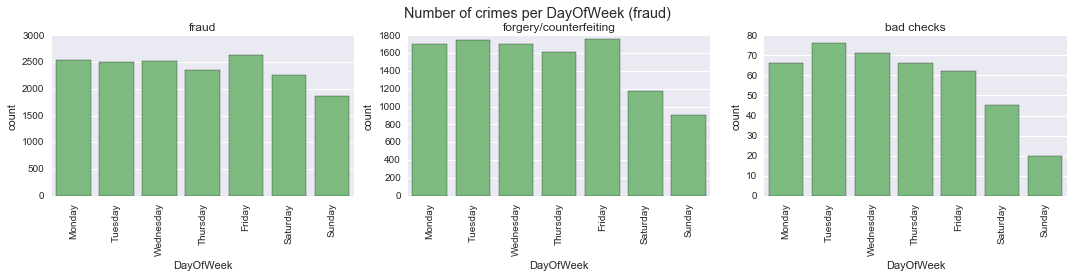

In [16]:
plot_count_of(categories, 'fraud', 'DayOfWeek', week_days)

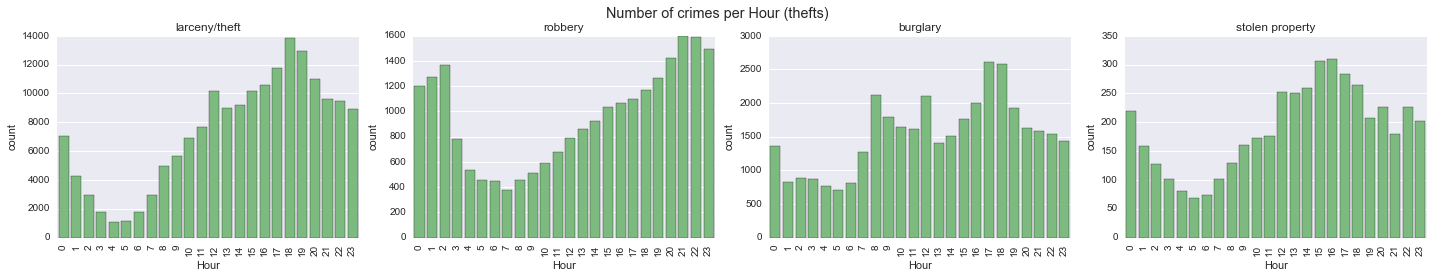

In [17]:
plot_count_of(categories, 'thefts', 'Hour', hours)

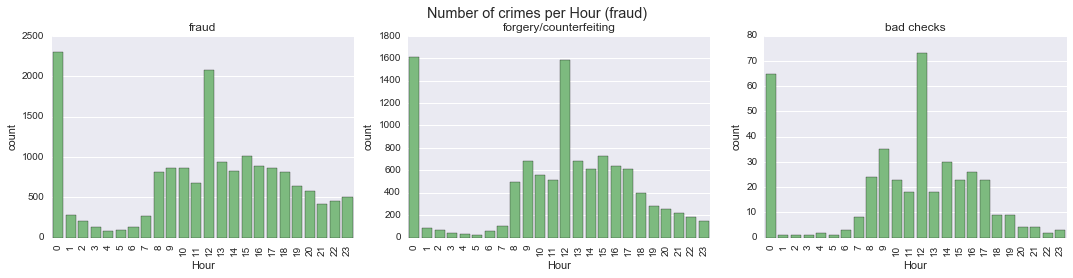

In [18]:
plot_count_of(categories, 'fraud', 'Hour', hours)